In [222]:
!python -m pip install --quiet pandas scikit-learn numpy matplotlib seaborn geopy folium tqdm plotly

<h3>Cargar Dataset</h3>
<h5>120 años de Juegos Olímpicos</h5>

In [223]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
ruta = 'src/athlete_events.csv' #https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

print("Cargando dataset ...")
df = pd.read_csv(ruta)
print("Dataset cargado correctamente.")


Cargando dataset ...
Dataset cargado correctamente.


<h1>Análisis descriptivo</h1>

In [224]:
print(df.info())
print("\n", df.head(1))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None

    ID       Name Sex   Age  Height  Weight   Team  NOC        Games  Year  \
0   1  A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer  1992   

   Season       C

<h3>Observamos el número de valores NULL por columna.</h3>

In [225]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

<h3>Eliminar NO DATA</h3>

Las columnas ['ID'] y ['Name'] no nos aportan nada.

La información de la columna ['Games'] la podemos sacar de ['Year'] y ['Season'].

La información de la columna ['Event'] la reducimos a la de la columna ['Sport'] para tener menos categorías.

Eliminamos la columna ['Team'] y nos quedamos con la columna ['NOC'] para no tener datos similares / duplicados.

In [226]:
df.drop(columns=["ID", "Name", "Games", "Event", "Team"], inplace=True)
print("\n", df.head(1))

   Sex   Age  Height  Weight  NOC  Year  Season       City       Sport Medal
0   M  24.0   180.0    80.0  CHN  1992  Summer  Barcelona  Basketball   NaN


<h3>Tratamiento de valores default</h3>
Pasamos los valores NaN a un valor default 'No Medal'

In [227]:
df['Medal'] = df['Medal'].fillna('No Medal')

<h1>Análisis univariante</h1>

<h3>Reparto de medallas</h3>

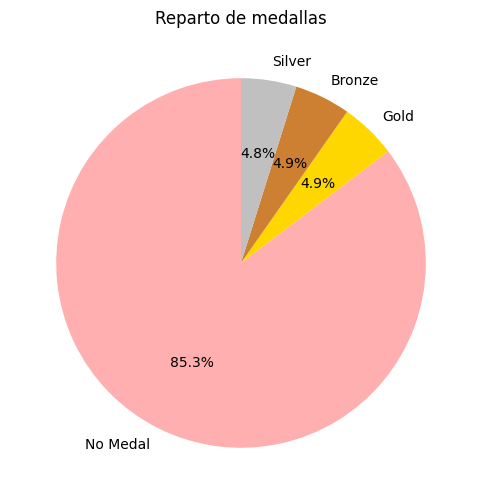

In [228]:
import matplotlib.pyplot as plt

# Contar los valores
total_medallas = df['Medal'].value_counts()

# Graficar pie chart con etiquetas
plt.figure(figsize=(10,6))
total_medallas.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=["#FFAFAF", "#FFD700", '#CD7F32',  '#C0C0C0'],
    startangle=90
)

plt.title("Reparto de medallas")
plt.ylabel("")
plt.show()

<h3>Edad de los atletas<h3>

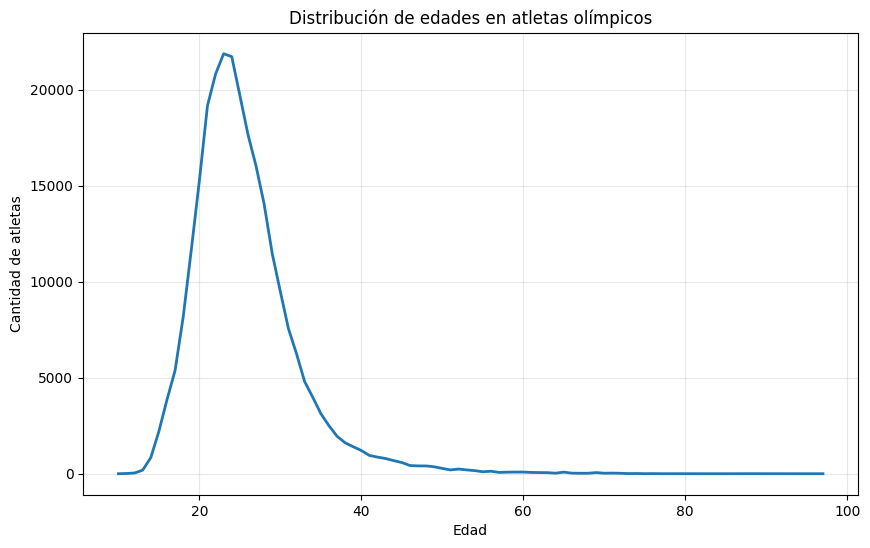

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

edad_atletas = df['Age'].dropna().value_counts().sort_index()

plt.figure(figsize=(10,6))

plt.plot(edad_atletas.index, edad_atletas.values, linewidth=2)

plt.xlabel("Edad")
plt.ylabel("Cantidad de atletas")
plt.title("Distribución de edades en atletas olímpicos")
plt.grid(True, alpha=0.3)

plt.show()

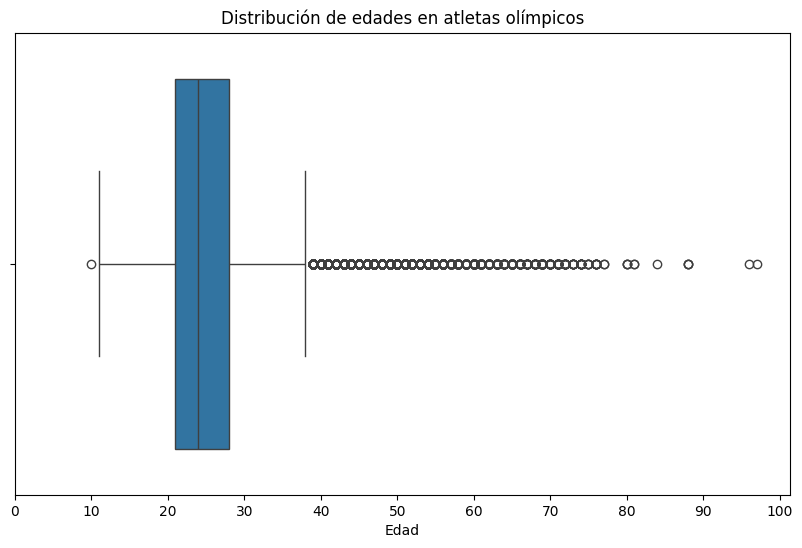


DATOS DESTACABLES:

Media de edad:  25.56
Edad más alta:  97.0
Edad más baja:  10.0


In [230]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Age'].dropna())

plt.xticks(range(0, 101, 10))
plt.xlabel("Edad")
plt.title("Distribución de edades en atletas olímpicos")
plt.show()

print("\nDATOS DESTACABLES:\n")
print("Media de edad: ", round(df['Age'].dropna().mean(), 2))
print("Edad más alta: ", df['Age'].dropna().max())
print("Edad más baja: ", df['Age'].dropna().min())

<h3>Deportes con más participación</h3>

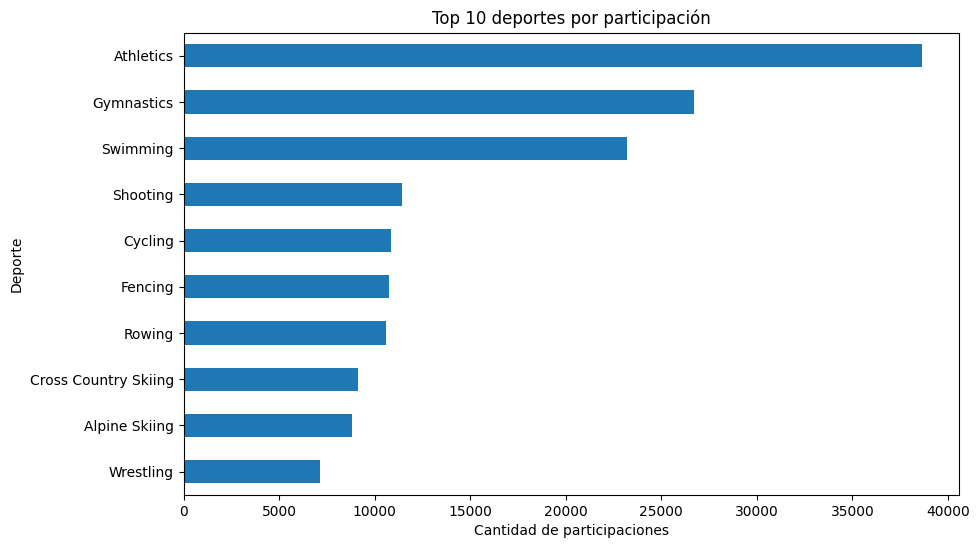

In [231]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
df['Sport'].value_counts().head(10).sort_values().plot(kind='barh')

plt.title("Top 10 deportes por participación")
plt.xlabel("Cantidad de participaciones")
plt.ylabel("Deporte")
plt.show()

<h3>Porcentaje de participación según el sexo</h3>

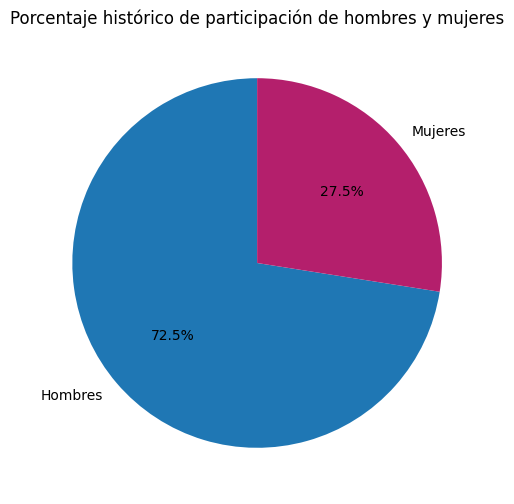

In [232]:
import matplotlib.pyplot as plt

# Mapear los números binarios con sus nombres
sex_map = {'F': 'Mujeres', 'M': 'Hombres'}

# Contar los valores
counts = df['Sex'].value_counts()

# Grafica pie chart
plt.figure(figsize=(10,6))
counts.plot(
    kind='pie',
    labels=[sex_map[i] for i in counts.index],
    autopct='%1.1f%%',
    colors=["#1f77b4", "#b41f6c"],
    startangle=90
)

plt.title("Porcentaje histórico de participación de hombres y mujeres")
plt.ylabel("")  # Eliminar etiqueta
plt.show()

<h1>Análisis multivariante</h1>

<h3>Participación de atletas según el sexo durante los años</h3>

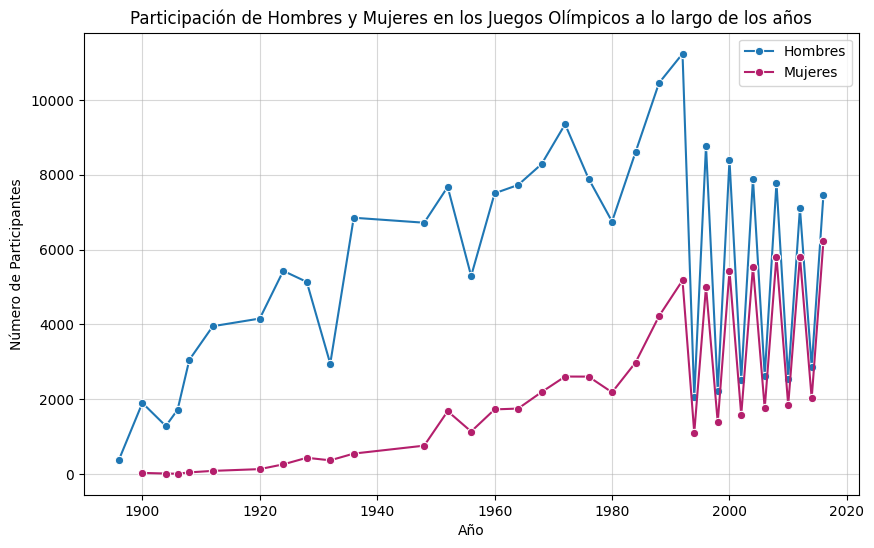

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

participacion = df.groupby(['Year', 'Sex']).size().reset_index(name='Participantes')

# Mapear los números binarios con sus nombres
sex_map = {'F': 'Mujeres', 'M': 'Hombres'}

# Crear columna con el nombre de los sexos a partir del mapeo
participacion['Sexo'] = participacion['Sex'].map(sex_map)

# Gráfica de puntos
plt.figure(figsize=(10,6))
sns.lineplot(
    data=participacion,
    x='Year',
    y='Participantes',
    hue='Sexo',
    marker='o',
    palette=["#1f77b4", "#b41f6c"]
)

# Estilo y etiquetas
plt.title('Participación de Hombres y Mujeres en los Juegos Olímpicos a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de Participantes')
plt.grid(True, alpha=0.5)
plt.legend(title='')
plt.show()

<h3>Reparto de medallas por año</h3>

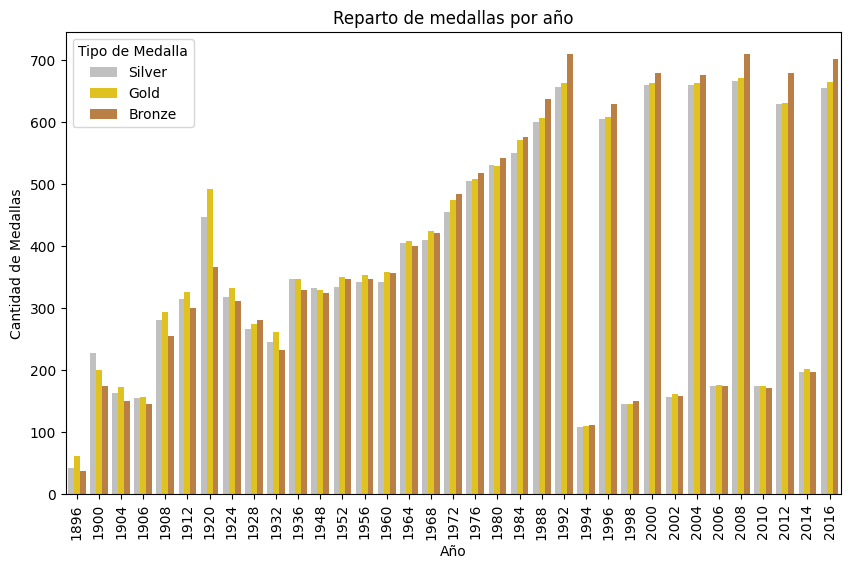

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(
    x='Year',
    hue='Medal',
    data=df[df['Medal'] != 'No Medal'],
    palette={"Bronze": '#CD7F32', "Silver": '#C0C0C0', "Gold": '#FFD700'}
)

plt.xticks(rotation=90)
plt.title("Reparto de medallas por año")
plt.ylabel("Cantidad de Medallas")
plt.xlabel("Año")
plt.legend(title="Tipo de Medalla")
plt.show()

<h3>Países con más medallas olímpicas</h3>

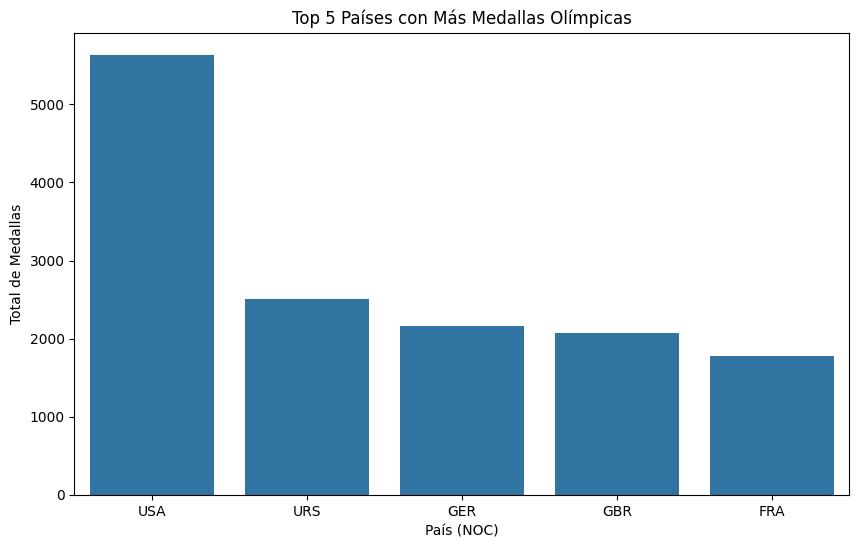

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(
    data=df[df['Medal'] != 'No Medal'],
    x='NOC',
    order=df[df['Medal'] != 'No Medal']['NOC'].value_counts().head(5).index
)
plt.title('Top 5 Países con Más Medallas Olímpicas')
plt.xlabel('País (NOC)')
plt.ylabel('Total de Medallas')
plt.show()

<h3>Relación entre altura y peso</h3>

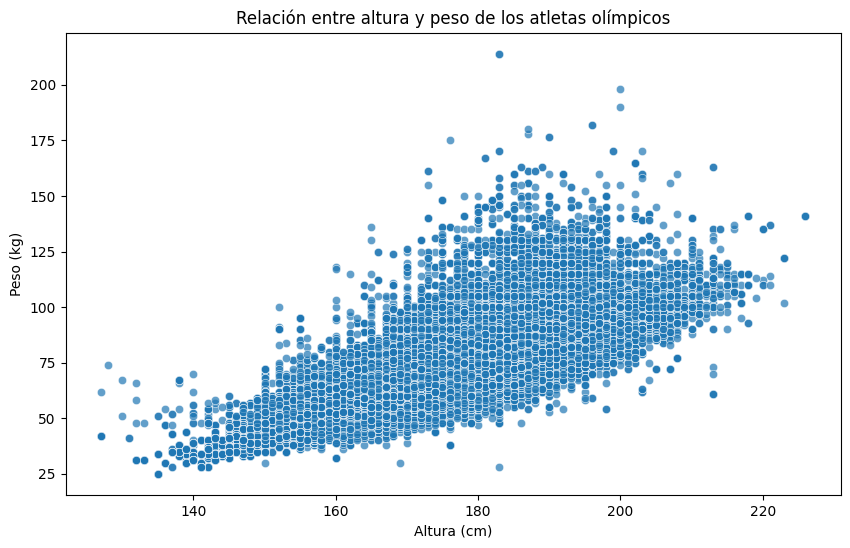

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

df[['Height', 'Weight']] = df[['Height', 'Weight']].dropna()

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Height',
    y='Weight',
    alpha=0.7
)

plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.title("Relación entre altura y peso de los atletas olímpicos")
plt.show()

<h3>Deportes con más participación de mujeres en ediciones de Inverno</h3>

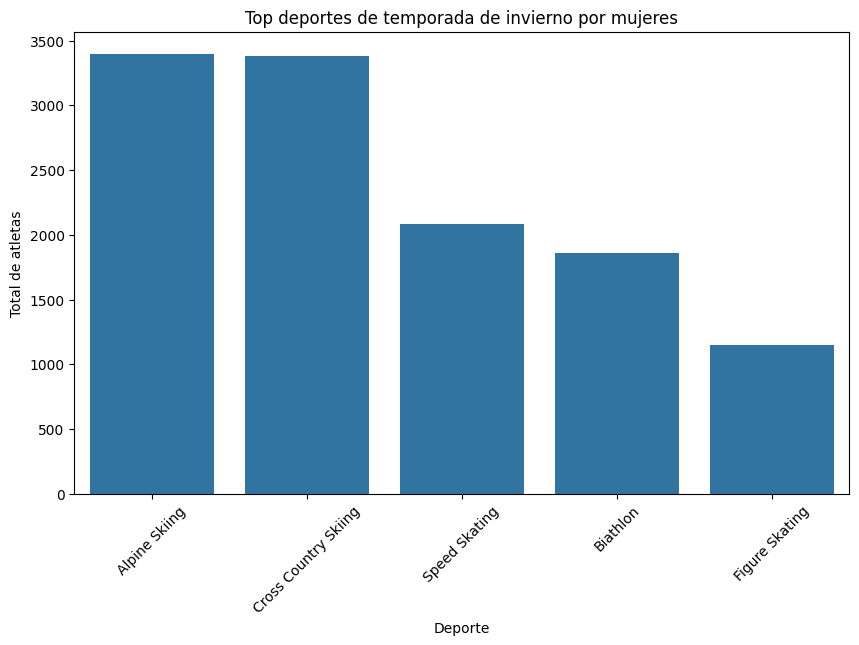

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(
    data=df[(df['Season'] == 'Winter') & (df['Sex'] == 'F')],
    x='Sport',
    order=df[(df['Season'] == 'Winter') & (df['Sex'] == 'F')]['Sport'].value_counts().head(5).index
)

plt.title('Top deportes de temporada de invierno por mujeres')
plt.xlabel('Deporte')
plt.ylabel('Total de atletas')
plt.xticks(rotation=45)
plt.show()

<h2>Tratamiento de valores NaN</h2

In [238]:
print("Número de filas previas a la eliminación de valores NaN:", len(df))

df = df.dropna(subset=['Height'])
df = df.dropna(subset=['Weight'])
df = df.dropna(subset=['Age'])

print("Número de filas tras eliminar valores NaN:", len(df))

Número de filas previas a la eliminación de valores NaN: 271116
Número de filas tras eliminar valores NaN: 206165


<h3>Codificación de las variables categóricas</h3>

In [239]:
# from sklearn.preprocessing import LabelEncoder

# Se ha usado un "Label Encoder" manual ya que la codificación mediante LabelEncoder()
# se hacía de forma alfabética, lo que nos perjudica si queremos ordenar las medallas
# de peor a mejor resultado (No Medal -> Bronze -> Silver -> Gold)

# Visualizamos los diferentes valores en la columna ['Medal']
print("Valores únicos antes de la codificación:", df['Medal'].unique())

# Realizamos un diccionario con los valores actuales y los numéricos a los que queremos codificar
medal_map = {'No Medal': 0, 'Bronze': 1, 'Silver': 2, 'Gold': 3}

# Codificamos las variables categóricas a numéricas
df['Medal'] = df['Medal'].map(medal_map)

# Comprobar resultado
print("Valores únicos una vez codificacos:", df['Medal'].unique())

# 0 => No Medal
# 1 => Bronze
# 2 => Silver
# 3 => Gold

Valores únicos antes de la codificación: ['No Medal' 'Bronze' 'Gold' 'Silver']
Valores únicos una vez codificacos: [0 1 3 2]


<h3>Binarización</h3>
Se realiza binarización sobre las columnas ['Sex'] y ['Season']

In [240]:
df['Sex_Male'] = (df['Sex'] == "M").astype(int)
df['Season_Winter'] = (df['Season'] == "Winter").astype(int)

print(df[['Sex_Male', 'Season_Winter']].head(1))

df.drop(columns=["Sex", "Season"], inplace=True)

   Sex_Male  Season_Winter
0         1              0


<h3>Escalado</h3>
Se aplica un escalado entre 0 y 1 a las columnas ['Age'], ['Weight'] y ['Height']

In [241]:
scaler = MinMaxScaler()
df[['Age', 'Weight', 'Height']] = scaler.fit_transform(df[['Age', 'Weight', 'Height']])

print(df[['Age', 'Weight', 'Height']].head(1))

        Age    Weight    Height
0  0.216667  0.291005  0.535354


<h3>Mapa de calor relacional</h3>

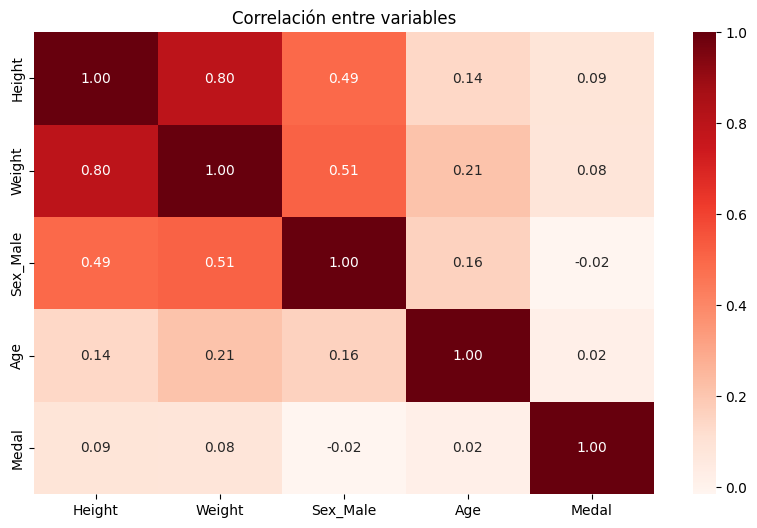

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['Height', 'Weight', 'Sex_Male', 'Age', 'Medal']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlación entre variables")
plt.show()

<h1>REFACTOR VICENT BENAVENT O DAVID PALET</h1>

<h3>Se debe mostrar un mapa del mundo con bolas de color que muestre la posicion de las sedes olímpicas</h3>
<h4>Finalmente se debe de mover a la penúltima posicion de los ejemplos de Análisis Multivariable</h4>

In [243]:
import numpy as np
import plotly.express as px

# Escalar tamaños de las burbujas
df_grouped_clean['size_scaled'] = np.log1p(df_grouped_clean['count'])

# Escala de rojos: de rojo claro a rojo intenso
red_scale = ["#ffcccc", "#ff6666", "#cc0000"]

# Crear mapa de burbujas
fig = px.scatter_geo(
    df_grouped_clean,
    lat='latitude', lon='longitude',
    size='size_scaled',
    color='count',
    hover_name='City',
    projection='natural earth',
    size_max=15,
    color_continuous_scale=red_scale
)

# Layout grande
fig.update_layout(
    title="Mapa de burbujas por ciudad",
    geo=dict(
        showland=True,
        landcolor="lightgreen",
        showocean=True,
        oceancolor="lightblue"
    ),
    width=900,
    height=500
)

fig.show()

NameError: name 'df_grouped_clean' is not defined

<h2>Resultado de la preparación de datos EDA</h2>

In [244]:
df.head()

,Age,Height,Weight,NOC,Year,City,Sport,Medal,Sex_Male,Season_Winter
0,0.216667,0.535354,0.291005,CHN,1992,Barcelona,Basketball,0,1,0
1,0.200000,0.434343,0.185185,CHN,2012,London,Judo,0,1,0
4,0.166667,0.585859,0.301587,NED,1988,Calgary,Speed Skating,0,0,1
5,0.166667,0.585859,0.301587,NED,1988,Calgary,Speed Skating,0,0,1
6,0.233333,0.585859,0.301587,NED,1992,Albertville,Speed Skating,0,0,1
